In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


In [3]:
with open('data_batch_1', 'rb') as f:
    dat = pickle.load(f, encoding='bytes')

In [4]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(dat[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

In [5]:
images = images / 255.

In [6]:
input_layer = Input(shape=(32, 32, 3,))

In [7]:
hidden_encoding = Conv2D(
    32, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(input_layer)

In [8]:
encoded = MaxPooling2D((2, 2))(hidden_encoding)

In [9]:
hidden_decoding = Conv2D(
    32, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(encoded)

In [10]:
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)

In [11]:
decoded = Conv2D(
    3, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='sigmoid',
    padding='same', # How to apply the weights to the images
)(upsample_decoding)

In [12]:
autoencoder = Model(input_layer, decoded)

In [13]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)         867       
Total params: 11,011
Trainable params: 11,011
Non-trainable params: 0
_________________________________________________________

In [14]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [15]:
autoencoder.fit(images, images, epochs=20)

Epoch 1/20
313/313 [==============================] - 23s 74ms/step - loss: 0.6946
Epoch 2/20
313/313 [==============================] - 23s 73ms/step - loss: 0.6935
Epoch 3/20
313/313 [==============================] - 24s 75ms/step - loss: 0.6924
Epoch 4/20
313/313 [==============================] - 23s 74ms/step - loss: 0.6916
Epoch 5/20
313/313 [==============================] - 24s 77ms/step - loss: 0.6908 0s - loss: 
Epoch 6/20
313/313 [==============================] - 24s 76ms/step - loss: 0.6901
Epoch 7/20
313/313 [==============================] - 29s 94ms/step - loss: 0.6895
Epoch 8/20
313/313 [==============================] - 29s 94ms/step - loss: 0.6889
Epoch 9/20
313/313 [==============================] - 26s 83ms/step - loss: 0.6883
Epoch 10/20
313/313 [==============================] - 25s 80ms/step - loss: 0.6877
Epoch 11/20
313/313 [==============================] - 25s 79ms/step - loss: 0.6871
Epoch 12/20
313/313 [==============================] - 25s 81ms/step - lo

In [16]:
encoder_output = Model(input_layer, encoded).predict(images[:5])

In [17]:
encoder_output = encoder_output.reshape((-1, 256, 32))

In [18]:
decoder_output = autoencoder.predict(images[:5])

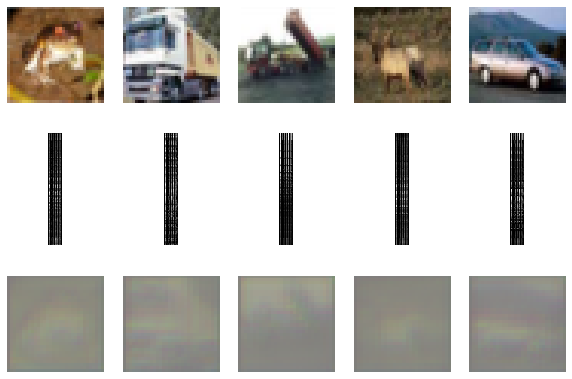

In [19]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i])
    plt.axis('off')        